In [1]:
%matplotlib inline

In [2]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 


In [3]:
print('matplotlib version: ', mpl.__version__)
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)


matplotlib version:  3.4.3
numpy version:  1.21.4
pandas version:  1.3.3


# Beta Dimentionality Reduction (t-SNE plots)

This notebook includes the code to generate color-coded t-NSE plots from beta weights shown in **Figure 4** and supplementary figures. 


To run the cells, you will need to **pull the following input files**: 
* ***cneuromod-things/THINGS/glmsingle/task-things_imgAnnotations.json***
* ***cneuromod-things/THINGS/glmsingle/sub-{s}/descriptive/sub-{s}_task-things_space-T1w_stat-tSNE_label-visualROIs_desc-{perImage, perTrial}_statseries.npz***


In [4]:
"""
Define support functions, paths and parameters
"""

# Support functions & variables to build the y data matrix (stimulus labels and annotations)
def get_val(row, value):
    return image_details[row['image_name']][value]

def is_member_of(row, cat_name):
    return cat_name in row['highercat53_names']

img_vals = ['image_category', 'things_image_nr', 'things_category_nr', 
            'categ_arousal', 'categ_be_moved', 'categ_concreteness', 
            'categ_consistency', 'categ_grasp', 'categ_heavy', 
            'categ_hold', 'categ_living', 'categ_manmade', 
            'categ_moves', 'categ_nameability', 'categ_natural', 
            'categ_pleasant', 'categ_precious', 'categ_size',
            'categ_wordfreq_COCA', 'highercat27_names', 
            'highercat53_names', 'highercat53_num', 'img_consistency', 
            'img_nameability', 
            'manual_face', 'manual_body', 'manual_lone_object', 'manual_human_face',
            'manual_human_body', 'manual_nh_mammal_face', 'manual_nh_mammal_body',
            'manual_central_face', 'manual_central_body', 'manual_artificial_face',
            'manual_artificial_body', 'manual_scene', 'manual_rich_background']

cat_vals = ['animal', 'arts and crafts supply', 'electronic device', 'clothing',
            'food', 'plant', 'fruit', 'vegetable', 'tool', 'vehicle', 'furniture']


# Set paths
data_file_path = Path("../../THINGS/glmsingle").resolve()
fig_save_path = Path("../figures").resolve()

# Load image labels and annotations
with open(f"{data_file_path}/task-things_imgAnnotations.json", "r") as f:
    image_details = json.load(f)

    
# Define graph dimensions (in x and y) per subject for each ROI    
graph_dimensions = {
    "perImage": {
        '01': {
            'x': {
                "face_FFA_OFA": (-19.5, 17.5),
                "scene_PPA_MPA_OPA": (-14, 12),
                "V1_V2_V3": (-14.5, 15),
                "floc_3contrasts": (-13, 11),
                "floc_3contrasts_lowthresh": (-15.5, 14.5), # FIX
                "top_NC": (-21.5, 22),                
            },
            'y': {
                "face_FFA_OFA": (-15, 14),
                "scene_PPA_MPA_OPA": (-14, 13.5),
                "V1_V2_V3": (-17.5, 18.5),
                "floc_3contrasts": (-20, 19),
                "floc_3contrasts_lowthresh": (-15.5, 17.5), # FIX
                "top_NC": (-15, 17),                
            },
        },
        '02': {
            'x': {
                "face_FFA_OFA": (-11.5, 11.5),
                "scene_PPA_MPA_OPA": (-20.5, 20.5),
                "V1_V2_V3": (-15.5, 15.5),
                "floc_3contrasts": (-18, 20),
                "floc_3contrasts_lowthresh": (-15, 14), # FIX
                "top_NC": (-31, 31),      
            },
            'y': {
                "face_FFA_OFA": (-22, 22),
                "scene_PPA_MPA_OPA": (-12, 11),
                "V1_V2_V3": (-13, 14),
                "floc_3contrasts": (-15, 15),
                "floc_3contrasts_lowthresh": (-16.5, 16.5), # FIX
                "top_NC": (-18.5, 17),           
            },
        },
        '03': {
            'x': {
                "face_FFA_OFA": (-20, 20),
                "scene_PPA_MPA_OPA": (-29.5, 32.5),
                "V1_V2_V3": (-20, 21),
                "floc_3contrasts": (-28.5, 28),
                "floc_3contrasts_lowthresh": (-21, 21), # FIX
                "top_NC": (-31, 27),       
            },
            'y': {
                "face_FFA_OFA": (-25.5, 28),
                "scene_PPA_MPA_OPA": (-19, 18),
                "V1_V2_V3": (-23.5, 22),
                "floc_3contrasts": (-21, 19),
                "floc_3contrasts_lowthresh": (-26, 25), # FIX
                "top_NC": (-25.6, 27),             
            },
        }    
    },
    "perTrial": {
        '01': {
            'x': {
                "face_FFA_OFA": (-26, 26.5),
                "scene_PPA_MPA_OPA": (-25, 26),
                "V1_V2_V3": (-56, 54),
                "floc_3contrasts": (-43, 44),
                "floc_3contrasts_lowthresh": (-35, 37), # FIX
                "top_NC": (-45, 43),            
            },
            'y': {
                "face_FFA_OFA": (-45, 47.5),
                "scene_PPA_MPA_OPA": (-14.5, 14.5),
                "V1_V2_V3": (-45, 45),
                "floc_3contrasts": (-30, 30),
                "floc_3contrasts_lowthresh": (-37, 37), # FIX
                "top_NC": (-27, 27),         
            },
        },
        '02': {
            'x': {
                "face_FFA_OFA": (-34, 34),
                "scene_PPA_MPA_OPA": (-31, 31),
                "V1_V2_V3": (-44, 44),
                "floc_3contrasts": (-27, 27),
                "floc_3contrasts_lowthresh": (-28, 28), # FIX
                "top_NC": (-49, 49),          
            },
            'y': {
                "face_FFA_OFA": (-21.5, 22.5),
                "scene_PPA_MPA_OPA": (-15, 14),
                "V1_V2_V3": (-34, 32.5),
                "floc_3contrasts": (-29, 29),
                "floc_3contrasts_lowthresh": (-37, 37), # FIX
                "top_NC": (-23, 25),                
            },
        },
        '03': {
            'x': {
                "face_FFA_OFA": (-42, 40),
                "scene_PPA_MPA_OPA": (-48, 45),
                "V1_V2_V3": (-40, 40),
                "floc_3contrasts": (-43, 40),
                "floc_3contrasts_lowthresh": (-43, 40), # FIX
                "top_NC": (-48, 48),        
            },
            'y': {
                "face_FFA_OFA": (-23, 24),
                "scene_PPA_MPA_OPA": (-27, 27),
                "V1_V2_V3": (-32, 32),
                "floc_3contrasts": (-34, 32),
                "floc_3contrasts_lowthresh": (-35, 35), # FIX
                "top_NC": (-34, 33),        
            },
        }    
    }
}


In [5]:
"""
Adjust the variables below


Pick a subject number
E.g., "01", "02" or "03"

Note that data are not available for sub-06 who did not complete
the fLoc and retinotopy localizers (no task-derived ROI masks)
"""
s = "03"  # "01", "02", "03"


"""
Select the ROI whose signal was used to derive t-SNE plots
"""

#roi = 'face_FFA_OFA'               # t-SNE from select FFA and OFA voxels (face-specific ROIs)
#roi = 'scene_PPA_MPA_OPA'          # t-SNE from select PPA, MPA and OPA voxels (scene-specific ROIs)
#roi = 'V1_V2_V3'                   # t-SNE from V1, V2 and V3 voxels (low-level visual ROIs)
roi = 'floc_3contrasts_lowthresh'   # t-SNE from voxels with t > 2.5 on face, body or scene fLoc contrast (threshold used in the paper)
#roi = 'floc_3contrasts'            # t-SNE from voxels with t > 3.72 on face, body or scene fLoc contrast (higher threshold than paper)
#roi = 'top_NC'                     # t-SNE from voxels with top noise ceiling scores from the THINGS image recognition task


"""
Select the type of results to showcase: trial-wise or image-wise signal
"""

res_type = 'perImage'           # analysis on betas averaged per image across repetitions
#res_type = 'perTrial'          # analysis on betas from individual trials 


######################################################################

'''
Load the t-SNE results and prepare a dataframe with image labels 

Nothing to select here.
'''

tsne_res_files = np.load(
    f"{data_file_path}/sub-{s}/descriptive/sub-{s}_task-things_space-T1w_"
    f"stat-tSNE_label-visualROIs_desc-{res_type}_statseries.npz",
    allow_pickle=True,
)
img_idx = tsne_res_files['image_names']

df_y = pd.DataFrame(img_idx, columns=['image_name'])

for ival in img_vals:
    df_y[ival] = df_y.apply(lambda row: get_val(row, ival), axis=1)

df_y['central_human_face'] = (df_y['manual_human_face'].to_numpy()*df_y['manual_central_face'].to_numpy()).astype(bool)
df_y['central_human_body'] = (df_y['manual_human_body'].to_numpy()*df_y['manual_central_body'].to_numpy()).astype(bool)
df_y['central_living'] = ((df_y['manual_body'].to_numpy()*df_y['manual_central_body'].to_numpy()) + (df_y['manual_face'].to_numpy()*df_y['manual_central_face'].to_numpy())).astype(bool)

for cat_name in cat_vals:
    df_y[cat_name] = df_y.apply(lambda row: is_member_of(row, cat_name), axis=1) 

df_y['plant_fruit_veg'] = (df_y['plant'].to_numpy()+df_y['fruit'].to_numpy()+df_y['vegetable'].to_numpy()).astype(bool)



[]

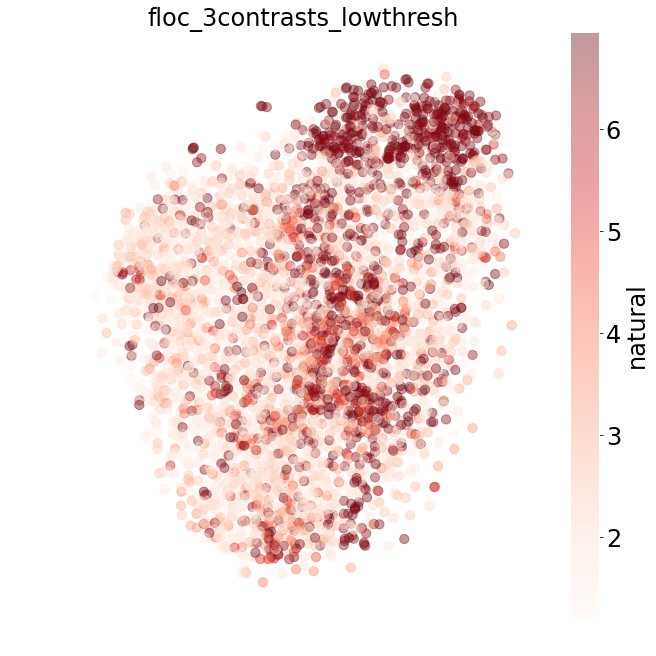

In [6]:
"""
Generate t-SNE plot with graded color-coded annotation based on THINGSplus ratings

Select a rating to annotate the t-SNE plot

"""

c_val = 'categ_natural'    # from the paper
#c_val = 'categ_moves'      # from the paper

#c_val = 'categ_size'
#cval = 'categ_precious'
#cval = 'categ_pleasant'
#cval = 'categ_manmade'
#cval = 'categ_living'
#cval = 'categ_hold'
#cval = 'categ_heavy'
#cval = 'categ_grasp'
#cval = 'categ_concreteness'
#cval = 'categ_be_moved'
#cval = 'categ_arousal'


# set to True to export a .png file
save_fig = False 

# set to True to show the ROI name and add a visible color bar
show_labels = True


# choose a color map
cmap = "Reds"      # cmap from the paper

#cmap = "Greens"   
#cmap = "Greys"     
#cmap = "Purples"   
#cmap = "YlGn"    
#cmap = "GnBu"    
#cmap = "PuBu"   
#cmap = "RdPu"   

  


###########################################

# Figure size
fs = (9, 9)
graph_limits = graph_dimensions[res_type]

SMALLER_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALLER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=SMALLER_SIZE)  # fontsize of the figure title

# dot size
size_val = 85

# dot opacity
a_val = 0.4 if res_type == 'perImage' else 0.3

plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["axes.linewidth"] = 1

fig, ax = plt.subplots(constrained_layout=True, figsize=fs)

sc = ax.scatter(
    tsne_res_files[roi][:, 0],
    tsne_res_files[roi][:, 1],
    s = size_val,
    alpha = a_val,
    c=df_y[c_val],
    cmap=cmap,
)

ax.set_xlim(graph_limits[s]['x'][roi][0], graph_limits[s]['x'][roi][1])
ax.set_ylim(graph_limits[s]['y'][roi][0], graph_limits[s]['y'][roi][1])

if show_labels:
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label(c_val.split("categ_")[-1])
    ax.set_title(roi)

ax.set_facecolor('xkcd:white')
ax.tick_params(axis='both', color="white", labelcolor='white')

if save_fig:
    cb = '_CB' if show_labels else ''
    plt.savefig(f'{fig_save_path}/sub-{s}_t-SNE_{roi}_{res_type}_{c_val}{cb}.png', dpi=600)

plt.plot()    



[]

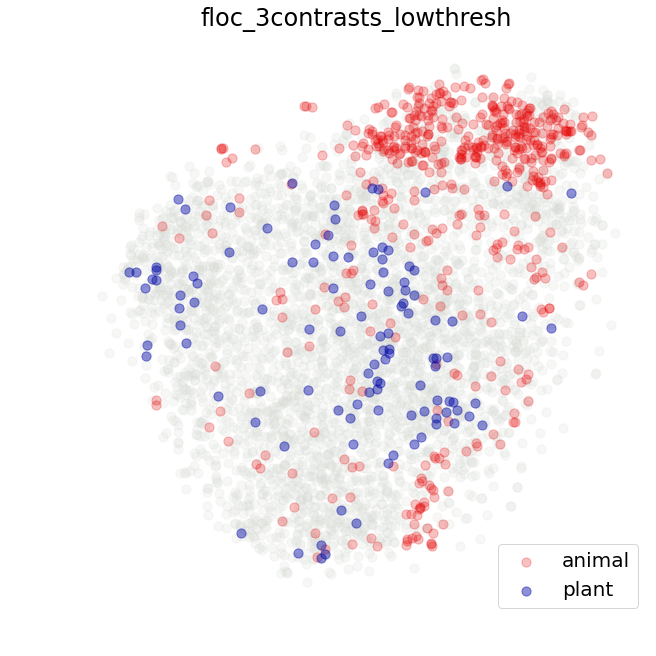

In [7]:
"""
Generate t-SNE plot with 2 color-coded categorical labels

Select two category labels to annotate the t-SNE plot

"""

col_var1, col_var2 = ['animal', 'plant']      # from the paper
#col_var1, col_var2 = ['animal', 'vehicle']    # from the paper

#col_var1, col_var2 = ['tool', 'vehicle']
#col_var1, col_var2 = ['manual_lone_object', 'manual_scene']
#col_var1, col_var2 = ['food', 'furniture']
    
    
# set to True to export a .png file
save_fig = False 

# set to True to show the ROI name and a legend with category labels
show_labels = True


"""
Select a color scheme
Link: to xkcd color survey results: https://xkcd.com/color/rgb/

The order is: [no labels, label 1, label 2, labels 1 & 2]
"""

c_list = ['xkcd:light grey', 'xkcd:red', 'xkcd:cobalt blue', 'xkcd:bright green']   # from the paper

#c_list = ['xkcd:baby blue', 'xkcd:red', 'xkcd:dark grey', 'xkcd:bright green']
#c_list = ['xkcd:very light green', 'xkcd:cerise', 'xkcd:ultramarine', 'xkcd:bright green']


###########################################

# Create data filters for category labels

bool_filter1 = df_y[col_var1].to_numpy().astype(bool)
bool_filter2 = df_y[col_var2].to_numpy().astype(bool)
overlap = np.sum(bool_filter1* bool_filter2)!=0

if overlap:
    overlap_filter = (bool_filter1 * bool_filter2).astype(bool)
bothcat_filter = (bool_filter1 + bool_filter2).astype(bool)


# Apply filters to obtain data points

md_c1 = tsne_res_files[roi][bool_filter1]
md_c2 = tsne_res_files[roi][bool_filter2]
md_none = tsne_res_files[roi][~bothcat_filter]


# Figure size
fs = (9, 9)
graph_limits = graph_dimensions[res_type]

SMALLER_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALLER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=SMALLER_SIZE)  # fontsize of the figure title

# dot size
size_val = 85
# dot opacity
a_vals = [0.2, 0.25, 0.45, 0.8] if res_type == 'perImage' else [0.1, 0.15, 0.35, 0.8]

plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["axes.linewidth"] = 1

fig, ax = plt.subplots(constrained_layout=True, figsize=fs)

ax.scatter(
    md_none[:, 0],
    md_none[:, 1],
    color=c_list[0],
    s = size_val,
    alpha = a_vals[0],
)
ax.scatter(
    md_c1[:, 0], 
    md_c1[:, 1], 
    color=c_list[1],
    s=size_val,
    alpha = a_vals[1],
    label=col_var1,
)
ax.scatter(
    md_c2[:, 0],
    md_c2[:, 1],
    color=c_list[2],
    s=size_val,
    alpha = a_vals[2],
    label=col_var2,
)

if overlap:
    md_over = tsne_res_files[roi][overlap_filter]
    ax.scatter(
        md_over[:, 0],
        md_over[:, 1],
        color=c_list[3],
        s=size_val,
        alpha = a_vals[3],
        label=f'{col_var1} + {col_var2}'
    )

ax.set_xlim(graph_limits[s]['x'][roi][0], graph_limits[s]['x'][roi][1])
ax.set_ylim(graph_limits[s]['y'][roi][0], graph_limits[s]['y'][roi][1])

ax.set_facecolor('xkcd:white')
ax.tick_params(axis='both', color="white", labelcolor='white')

if show_labels:
    ax.set_title(roi)
    ax.legend(loc='lower right')

if save_fig:
    sl = '_L' if show_labels else ''
    plt.savefig(f'{fig_save_path}/sub-{s}_t-SNE_{roi}_{res_type}_{col_var1}_{col_var2}{sl}.png', dpi=600)

plt.plot()    
        
        

In [ ]:
# quick loop to churn out all the figs

save_fig = True
show_labels = False
cmap = "Reds"

for s in ["01", "02", "03"]:
    
    for res_type in ['perImage', 'perTrial']:

        tsne_res_files = np.load(
            f"{data_file_path}/sub-{s}/descriptive/sub-{s}_task-things_space-T1w_"
            f"stat-tSNE_label-visualROIs_desc-{res_type}_statseries.npz",
            allow_pickle=True,
        )
        img_idx = tsne_res_files['image_names']

        df_y = pd.DataFrame(img_idx, columns=['image_name'])

        for ival in img_vals:
            df_y[ival] = df_y.apply(lambda row: get_val(row, ival), axis=1)

        df_y['central_human_face'] = (df_y['manual_human_face'].to_numpy()*df_y['manual_central_face'].to_numpy()).astype(bool)
        df_y['central_human_body'] = (df_y['manual_human_body'].to_numpy()*df_y['manual_central_body'].to_numpy()).astype(bool)
        df_y['central_living'] = ((df_y['manual_body'].to_numpy()*df_y['manual_central_body'].to_numpy()) + (df_y['manual_face'].to_numpy()*df_y['manual_central_face'].to_numpy())).astype(bool)

        for cat_name in cat_vals:
            df_y[cat_name] = df_y.apply(lambda row: is_member_of(row, cat_name), axis=1) 

        df_y['plant_fruit_veg'] = (df_y['plant'].to_numpy()+df_y['fruit'].to_numpy()+df_y['vegetable'].to_numpy()).astype(bool)

        
    
        for roi in ['face_FFA_OFA', 'scene_PPA_MPA_OPA', 'V1_V2_V3', 'floc_3contrasts_lowthresh']:

            for c_val in ['categ_natural', 'categ_moves']:

                fs = (9, 9)
                graph_limits = graph_dimensions[res_type]

                size_val = 85
                a_val = 0.4 if res_type == 'perImage' else 0.3

                plt.rcParams["axes.edgecolor"] = "white"
                plt.rcParams["axes.linewidth"] = 1

                fig, ax = plt.subplots(constrained_layout=True, figsize=fs)

                sc = ax.scatter(
                    tsne_res_files[roi][:, 0],
                    tsne_res_files[roi][:, 1],
                    s = size_val,
                    alpha = a_val,
                    c=df_y[c_val],
                    cmap=cmap,
                )

                ax.set_xlim(graph_limits[s]['x'][roi][0], graph_limits[s]['x'][roi][1])
                ax.set_ylim(graph_limits[s]['y'][roi][0], graph_limits[s]['y'][roi][1])

                if show_labels:
                    cbar = fig.colorbar(sc, ax=ax)
                    cbar.set_label(c_val.split("categ_")[-1])
                    ax.set_title(roi)

                ax.set_facecolor('xkcd:white')
                ax.tick_params(axis='both', color="white", labelcolor='white')

                if save_fig:
                    cb = '_CB' if show_labels else ''
                    plt.savefig(f'{fig_save_path}/sub-{s}_t-SNE_{roi}_{res_type}_{c_val}{cb}.png', dpi=600)

                plt.plot() 
                

In [ ]:
# quick loop to churn out all the figs

save_fig = True
show_labels = False
c_list = ['xkcd:light grey', 'xkcd:red', 'xkcd:cobalt blue', 'xkcd:bright green']

for s in ["01", "02", "03"]:
    
    for res_type in ['perImage', 'perTrial']:

        tsne_res_files = np.load(
            f"{data_file_path}/sub-{s}/descriptive/sub-{s}_task-things_space-T1w_"
            f"stat-tSNE_label-visualROIs_desc-{res_type}_statseries.npz",
            allow_pickle=True,
        )
        img_idx = tsne_res_files['image_names']

        df_y = pd.DataFrame(img_idx, columns=['image_name'])

        for ival in img_vals:
            df_y[ival] = df_y.apply(lambda row: get_val(row, ival), axis=1)

        df_y['central_human_face'] = (df_y['manual_human_face'].to_numpy()*df_y['manual_central_face'].to_numpy()).astype(bool)
        df_y['central_human_body'] = (df_y['manual_human_body'].to_numpy()*df_y['manual_central_body'].to_numpy()).astype(bool)
        df_y['central_living'] = ((df_y['manual_body'].to_numpy()*df_y['manual_central_body'].to_numpy()) + (df_y['manual_face'].to_numpy()*df_y['manual_central_face'].to_numpy())).astype(bool)

        for cat_name in cat_vals:
            df_y[cat_name] = df_y.apply(lambda row: is_member_of(row, cat_name), axis=1) 

        df_y['plant_fruit_veg'] = (df_y['plant'].to_numpy()+df_y['fruit'].to_numpy()+df_y['vegetable'].to_numpy()).astype(bool)

        
    
        for roi in ['face_FFA_OFA', 'scene_PPA_MPA_OPA', 'V1_V2_V3', 'floc_3contrasts_lowthresh']:

            for col_var1, col_var2 in [
                ['animal', 'plant'],
                ['animal', 'vehicle'],
                ['tool', 'vehicle'],
                ['manual_lone_object', 'manual_scene'],
                ['food', 'furniture'],
            ]:
                
                bool_filter1 = df_y[col_var1].to_numpy().astype(bool)
                bool_filter2 = df_y[col_var2].to_numpy().astype(bool)
                overlap = np.sum(bool_filter1* bool_filter2)!=0

                if overlap:
                    overlap_filter = (bool_filter1 * bool_filter2).astype(bool)
                bothcat_filter = (bool_filter1 + bool_filter2).astype(bool)


                # Apply filters to obtain data points

                md_c1 = tsne_res_files[roi][bool_filter1]
                md_c2 = tsne_res_files[roi][bool_filter2]
                md_none = tsne_res_files[roi][~bothcat_filter]


                # Figure size
                fs = (9, 9)
                graph_limits = graph_dimensions[res_type]

                size_val = 85
                a_vals = [0.2, 0.25, 0.45, 0.8] if res_type == 'perImage' else [0.1, 0.15, 0.35, 0.8]

                plt.rcParams["axes.edgecolor"] = "white"
                plt.rcParams["axes.linewidth"] = 1

                fig, ax = plt.subplots(constrained_layout=True, figsize=fs)

                ax.scatter(
                    md_none[:, 0],
                    md_none[:, 1],
                    color=c_list[0],
                    s = size_val,
                    alpha = a_vals[0],
                )
                ax.scatter(
                    md_c1[:, 0], 
                    md_c1[:, 1], 
                    color=c_list[1],
                    s=size_val,
                    alpha = a_vals[1],
                    label=col_var1,
                )
                ax.scatter(
                    md_c2[:, 0],
                    md_c2[:, 1],
                    color=c_list[2],
                    s=size_val,
                    alpha = a_vals[2],
                    label=col_var2,
                )

                if overlap:
                    md_over = tsne_res_files[roi][overlap_filter]
                    ax.scatter(
                        md_over[:, 0],
                        md_over[:, 1],
                        color=c_list[3],
                        s=size_val,
                        alpha = a_vals[3],
                        label=f'{col_var1} + {col_var2}'
                    )

                ax.set_xlim(graph_limits[s]['x'][roi][0], graph_limits[s]['x'][roi][1])
                ax.set_ylim(graph_limits[s]['y'][roi][0], graph_limits[s]['y'][roi][1])

                ax.set_facecolor('xkcd:white')
                ax.tick_params(axis='both', color="white", labelcolor='white')

                if show_labels:
                    ax.set_title(roi)
                    ax.legend(loc='lower right')

                if save_fig:
                    sl = '_L' if show_labels else ''
                    plt.savefig(f'{fig_save_path}/sub-{s}_t-SNE_{roi}_{res_type}_{col_var1}_{col_var2}{sl}.png', dpi=600)

                plt.plot()    
